# Perceptron and Capacity
Given $N$ number of data in $K$ dimensions can we classify them all correctly using a single perceptron?    
Given $K$ what is the max number of points $N$ that can be linear ceperated by a perceptron?  

For $N$ points there in total $2^N$ possible binary classifications. However, depending on $K$ there are usually smaller number of possible linear seperations, which means that there are data configurations that are impossible to classify using a single line (i.e. Perceptron).  
The number of possible linear sepearation $T(N, K)$ is given by the following formula:
$$
T(N, K) = 
\begin{cases}
2^N \quad &, \quad \text{if} \,\, K \geq N \\
2\sum_{k=0}^{K-1} \binom{N-1}{K} \quad &, \quad \text{if} \,\, K < N 
\end{cases}
$$  

We can show that the ratio $T(N, K)/2^N$ is close to $1$ for $ N\leq K$ and drops quickly to 0 for $N > 2K$. This suggest that the capacity of the perceptron is 2 bits per weight (i.e. per dimension). However there are still some cases where $N=2K$ that cannot be classified. An example is the XOR function $(N=4, K=2)$. 

The XOR function in 2-dim realizes the following table
| $x_1$ | $x_2$| $y = x_1\oplus x_2$|
|:-------:|:-----:|:----:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

For a single perceptron $\sigma(w_1x_1+w_2x_2+b)$ to correcly classify those 4 points the following inequalities should hold
$$
\begin{align}
w_1\cdot 0 +w_2\cdot 0 + b \leq 0 & \quad \rightarrow \quad b \leq 0 \\
w_1\cdot 0 +w_2\cdot 1 + b \leq 0 & \quad \rightarrow \quad w_1+b > 0 \\
w_1\cdot 1 +w_2\cdot 0 + b \leq 0 & \quad \rightarrow \quad w_2+b >0 \\ 
w_1\cdot 1 +w_2\cdot 1 + b \leq 0 & \quad \rightarrow \quad w_1+w_2+b \leq 0 
\end{align}
$$ 
which cannot hold. Hence a single perceptron cannot realize the XOR function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [45]:
y = np.array([0,1,1,0])
x = np.array([[0,0], [0,1], [1,0], [1,1]])

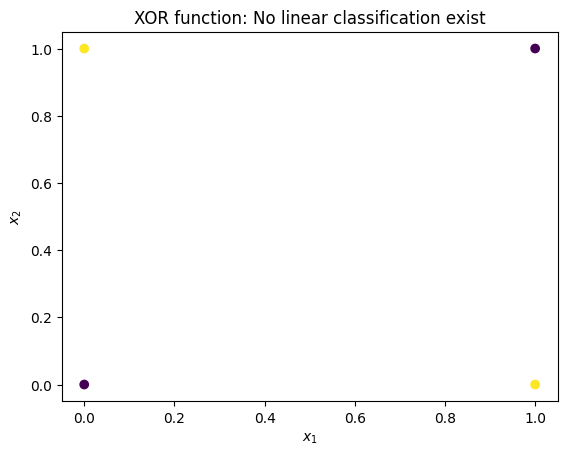

In [29]:
plt.scatter(x[:,0], x[:, 1], c = y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('XOR function: No linear classification exist')
# plt.legend()
plt.show()

There cannot be a single line that seperates the yellow from the purple points!  
However we can achive this using 2 perceptrons to separate each yellow point from the rest respectively, and another perceptron that gets the input of the previous 2.